In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt

from training.util import sgd, plot_losses, adam, lr_scheduler

/home/flo/anaconda3/envs/bdl2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import experiments.base.cifar as cifar

batch_size = 128
trainloader = cifar.cifar10_trainloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", batch_size=batch_size, subsample=5000)
testloader = cifar.cifar10_testloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
device = torch.device("cuda")

In [ ]:
import experiments.base.cifar as cifar
corrupted_testloader = cifar.cifar10_corrupted_testloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", intensity=4, batch_size=128)

In [83]:
from training.pp import MAP

layers = [
    ("preresnet-20", (32, 3, 10)),
    ("logsoftmax", ())
]

model = MAP(layers)

model.train_model(160, torch.nn.NLLLoss(), sgd(1e-1, weight_decay=1e-4, momentum=0.9, nesterov=True), trainloader, batch_size, device, scheduler_factory=lr_scheduler([80, 120], 0.1))

Epoch 0: loss 1.5686306953430176
Epoch 1: loss 1.0529301166534424
Epoch 2: loss 0.8770422339439392
Epoch 3: loss 0.7610902190208435
Epoch 4: loss 0.6916517019271851
Epoch 5: loss 0.6315617561340332
Epoch 6: loss 0.5899832844734192
Epoch 7: loss 0.5543512105941772
Epoch 8: loss 0.5241886377334595
Epoch 9: loss 0.5046862363815308
Epoch 10: loss 0.4847290813922882
Epoch 11: loss 0.469944566488266
Epoch 12: loss 0.45551446080207825
Epoch 13: loss 0.4400014579296112
Epoch 14: loss 0.42673036456108093
Epoch 15: loss 0.41807594895362854
Epoch 16: loss 0.406505823135376
Epoch 17: loss 0.4007037281990051
Epoch 18: loss 0.3915717601776123
Epoch 19: loss 0.38174712657928467
Epoch 20: loss 0.37116727232933044
Epoch 21: loss 0.36761578917503357
Epoch 22: loss 0.35726451873779297
Epoch 23: loss 0.3546295166015625
Epoch 24: loss 0.3455597162246704
Epoch 25: loss 0.3465329110622406
Epoch 26: loss 0.3442169725894928
Epoch 27: loss 0.33451539278030396
Epoch 28: loss 0.33069756627082825
Epoch 29: loss 0.

In [4]:
from training.pp import MAP
from training.vogn import iVONModuleFunctorch, VOGNModule

layers = [
    ("preresnet-20", (32, 3, 10)),
    ("logsoftmax", ())
]

model = VOGNModule(layers)
model.train_model(10, torch.nn.NLLLoss(), {"lr": 1e-4, "prior_prec": 150, "betas": (0.9, 0.999), "damping": 1, "augmentation": 1, "sample": False}, trainloader, batch_size, device, mc_samples=2)

In [84]:
import experiments.base.multiclass_classification as exp

model.to(device)
exp.eval_model(model, 5, testloader, device)

 Accuracy: 0.8496999740600586
 Avg Log Likelihood: -0.5370649695396423
 Avg Likelihood: 0.8302077054977417
 ECE: 0.06883288042247296


(tensor(0.8497),
 tensor(-0.5371),
 tensor(0.8302),
 <training.calibration.ClassificationCalibrationResults at 0x7fcc92551bb0>)

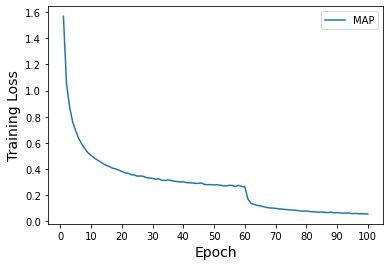

In [85]:
plot_losses("MAP", model.all_losses(), plt.subplot())